## Problem Statement
A Chinese automobile company **Geely Auto** aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 


They have contracted an **automobile consulting company** to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

## Business Goal 

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Data Dictionary
<img src = './Data_Dictionary_Snip.PNG'>

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.stats.diagnostic as dg

### Data Reading and Understanding the Characteristic

In [2]:
auto_df = pd.read_csv('./CarPrice_Assignment.csv')
auto_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Shape of the Dataset
auto_df.shape

(205, 26)

In [4]:
#Let's get more information about each feature
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

**Conclusion Drawn**: It Seems no Feature has any null values and the data types distribution is **float64(8), int64(8), object(10)** and Symbolling is also a categorical variable

In [5]:
# To get the stats of each Feature
auto_df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


**Conclusion Drawn**: There are some features for which the data scales are totally different so we need to do a Feature scalling prior to model building

In [6]:
# To Check if there is any columns with Null Values
auto_df.isnull().any().sum()
# As we can see that there is no columns which has Null Values

0

In [7]:
# To check whether any columns is there with Duplicated Values or not
# Here the Car ID is removed as that is unique
auto_df.iloc[:,1:].duplicated().sum() == 0
# As we can see below there is no row which has dulicated values

True

In [8]:
# To get the Company Name and the car model and drop the CarName 
auto_df['CarCompany'] = auto_df['CarName'].str.split(' ', n= 1, expand = True)[0]
auto_df['CarModel'] = auto_df['CarName'].str.split(' ', n= 1, expand = True)[1]
auto_df.drop('CarName', axis = 1, inplace = True)
auto_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [9]:
# Let's the unique names of the Car Model
auto_df['CarModel'].unique()

array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'MU-X', 'D-Max ', 'D-Max V-Cross', 'xj', 'xf',
       'xk', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc',
       'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'versa',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'cli

In [10]:
# Let's get the unique names of the Car Model
auto_df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Conclusion Driven**: As we can see in the unique names, there are some typos
1. maxda and mazda
2. Nissan and nissan
3. porsche and porcshce
4. toyota and toyouta
5. vokswagen and volkswagen and vw

So we would fix this Values with the appropriate values so that for each of these brands there will be one values values per each brand

In [11]:
# Retifying the Data
auto_df['CarCompany'] = auto_df['CarCompany'].replace({'maxda':'mazda', 'Nissan':'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vw':'volkswagen', 'vokswagen': 'volkswagen' })
auto_df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Data Visualization

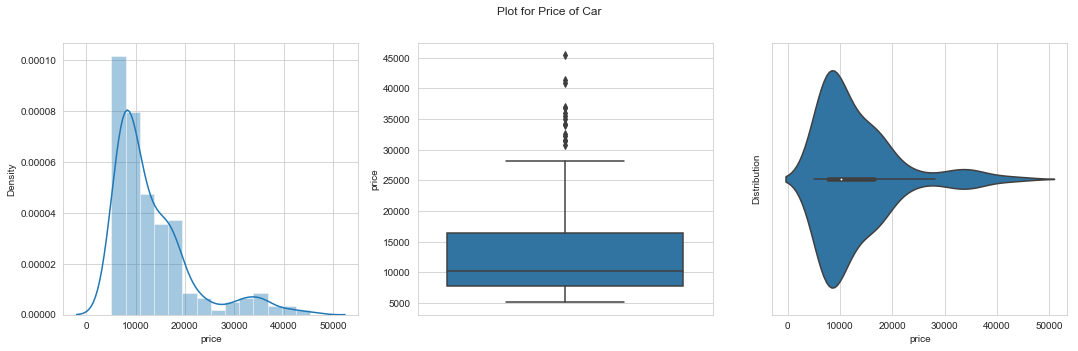

In [12]:
# Let's first see the Distribution of Car Price 
# As this is our Final Outcome, and let's see the Dataset Distribution

plt.figure(figsize=(18,5))
plt.suptitle('Plot for Price of Car')
# Histogram 
sns.distplot(auto_df['price'], ax = plt.subplot(1,3,1))
plt.ylabel('Density')

# To check the spread of data
sns.boxplot(y = auto_df['price'], ax = plt.subplot(1,3,2))
sns.violinplot(x = auto_df['price'], ax = plt.subplot(1,3,3))
plt.ylabel('Distribution')

plt.show()

**Conclusion Driven**:
1. Price values looks POsitively skewed, and we can also see from the box plot, atleast 75% of Data Points are below ~18k
2. The Data doesn't looks normally distributed
3. There are some prices of cars which is more than 38k that's seems nominal because there are some cars which are pricy

In [13]:
# To find out how many Car Models are there which are having more than 35000 as price
auto_df[auto_df['price'] > 35000].shape[0]

8

#### Let's Analyze the Categorical Columns
- Univariate + Bivariate Analysis

In [14]:
col_name = auto_df.select_dtypes(include=['object']).columns.tolist()
col_name

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CarCompany',
 'CarModel']

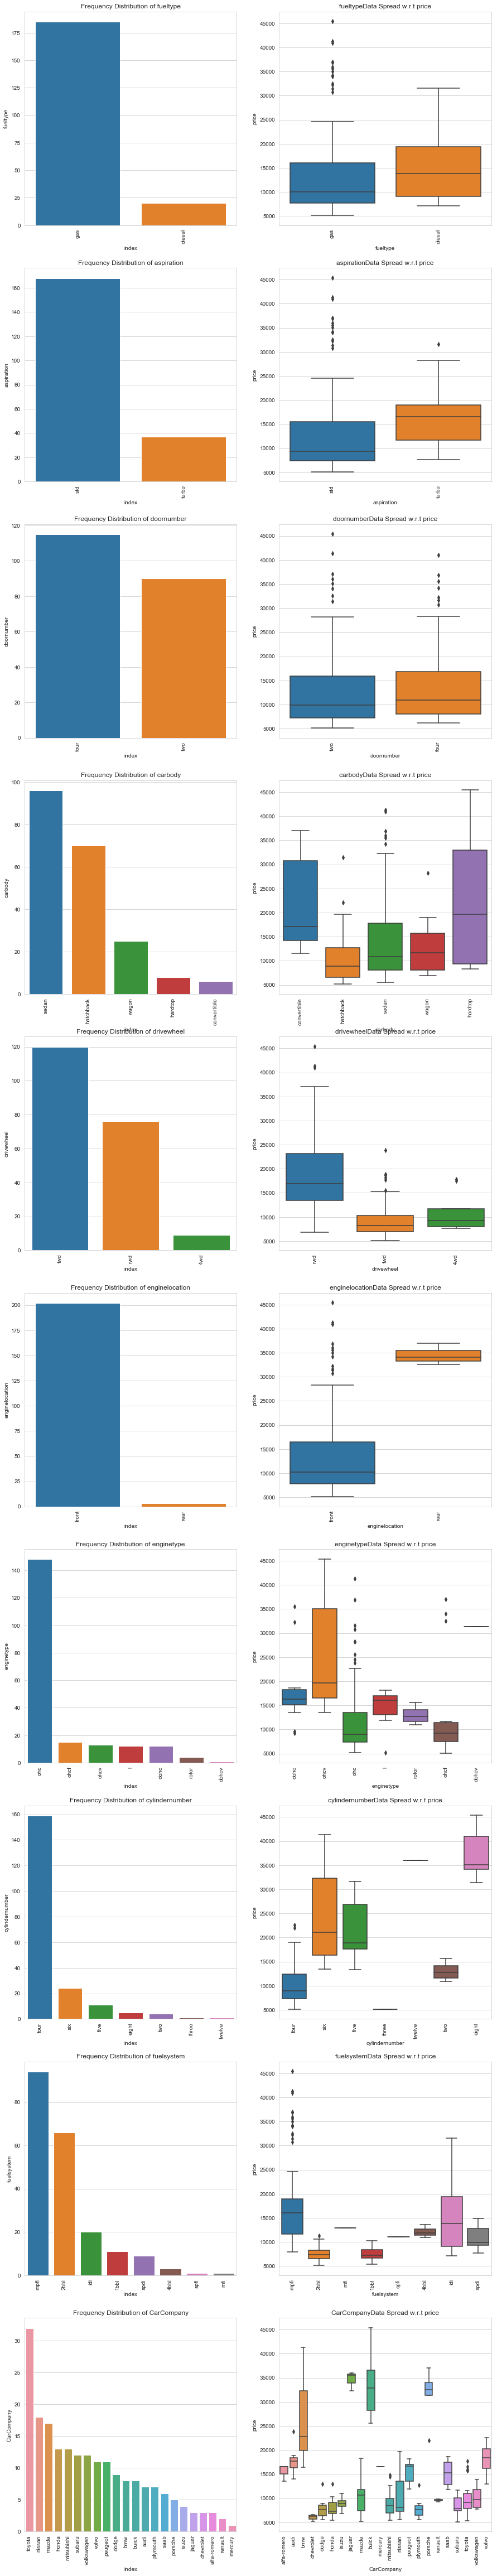

In [15]:
#Plot Categorical Variable
col_name.remove('CarModel') #As this has a lot of category
plt.figure(1,figsize=(15,100))
fig_idx= 0
for index,col in enumerate(col_name):
    fig_idx += 1 
    df = (pd.DataFrame(auto_df[col].value_counts())).reset_index()
    # Plot the Frequency plot
    sns.barplot(x = df['index'], y = df[col], ax = plt.subplot(12,2,fig_idx))
    plt.xticks(rotation = 90)
    plt.title('Frequency Distribution of ' + col )
    fig_idx += 1
    # Box plot for the spread of data for the categorical analysis 
    sns.boxplot(x = auto_df[col], y=auto_df.price,ax = plt.subplot(12,2,fig_idx))
    plt.xticks(rotation = 90)
    plt.title(col + 'Data Spread w.r.t ' + 'price' )

**Conclusion Driven**
1. Fuel Type Gas is preffered more compared to Diesel, 
      - From Box Plot there are few Cars which having Fuel type as Gas and they are very costly and Fuel Type as Diesel( doesn't have those  outliers ), but from the spread of data for Diesel cars, it looks like Diesel Cars are little Costly than Gas types cars
2. For the Aspiration Turbo, price is higher compared to other
3. Carbody Sedan is preffered more compared to other Carbody types. 
    - Hardtops price range is pretty huge
    - Convertible the price is higher compared to others
4. Fwd ( Front Wheel Drive ) is mostly preferred 
    - rwd (Rear Wheel drive) is most costlier compared to other types
5. Most of the cars have engine located on Front and very less cars have it on rear
    - But the cars which have their engine on reat they are very costly
6. Most of the cars have engine type as dhc
7. Most of the cars have four numbers of cylinder
    - Higher the cylinder higher is the price , but two number of cylinder price is higher compared to four number of cylinder and car with eight number of cyliders is more costlier than others
8. Toyota is preferred more compared to others
    - BMW, PORSCHE, JAGUAR & BUICK Car Comapnies car are most costly compared to others
9. For Door number four or two price range is nearly simialr & also the preferrance to buy that car is also very similar

#### Let's Analyze the Numerical Columns

In [16]:
col_name = auto_df.select_dtypes(include=np.number).columns.tolist()
col_name

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

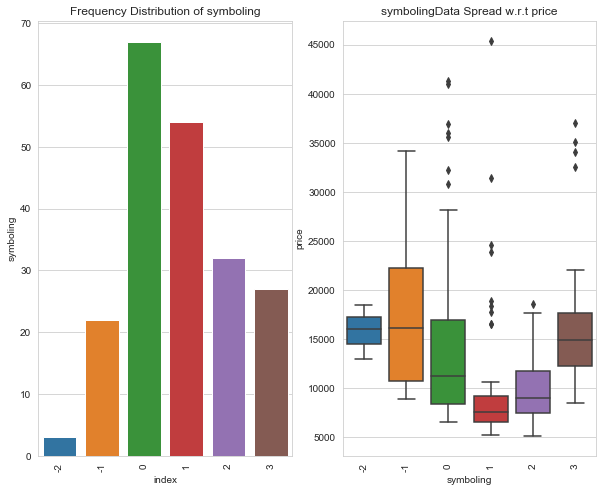

In [17]:
## plotting Symboling as a Categorical feature, as per the Data definition
plt.figure(figsize=(10,8))
col = 'symboling'
df = (pd.DataFrame(auto_df[col].value_counts())).reset_index()
sns.barplot(x = df['index'], y = df[col], ax = plt.subplot(1,2,1))
plt.xticks(rotation = 90)
plt.title('Frequency Distribution of ' + col )
sns.boxplot(x = auto_df[col], y=auto_df.price,ax = plt.subplot(1,2,2))
plt.xticks(rotation = 90)
plt.title(col + 'Data Spread w.r.t ' + 'price' )

col_name.remove('symboling')
col_name.remove('car_ID')

**Conclusion Driven**: 
1. As we can see for the symboling as 0 has more number of records compared to others and there are very few cars which are flaged as risky
    - As we can see the car which is having more price is flagged as more riskier compared to others

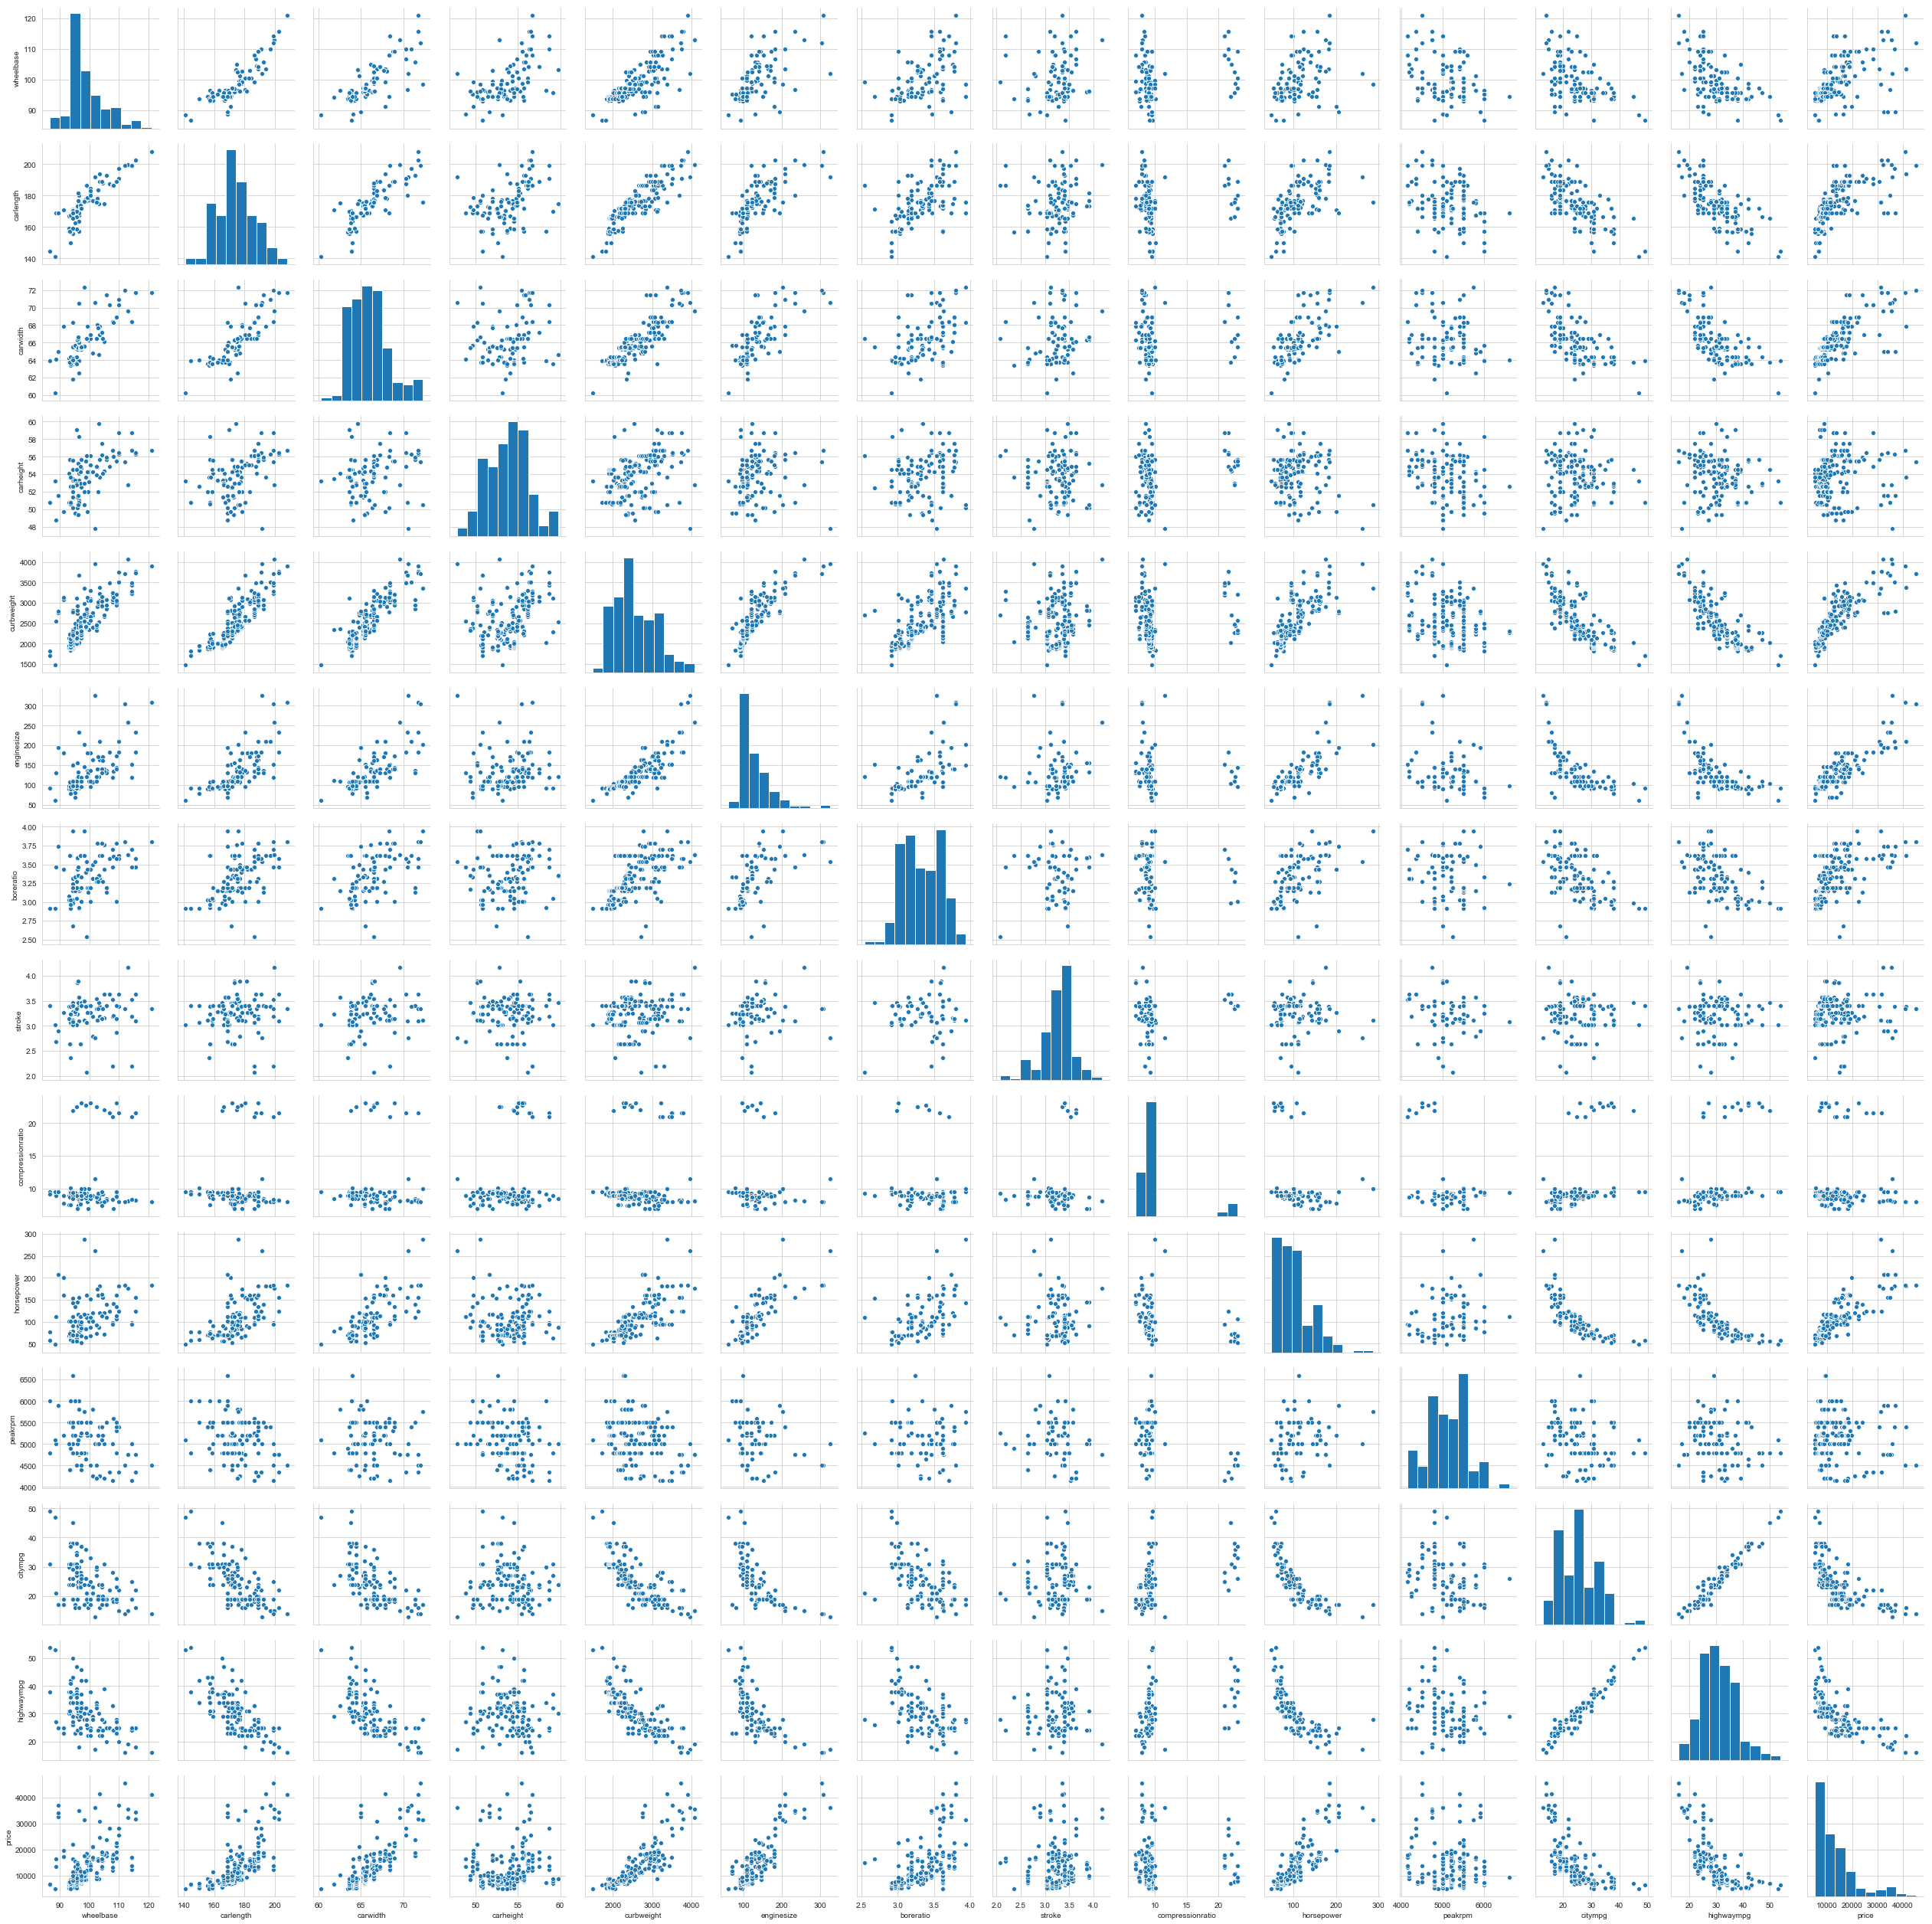

In [18]:
#Pair plots for all the Numerical Features
sns.pairplot(auto_df[col_name])
# Let's drill down into each numberical features
plt.show()

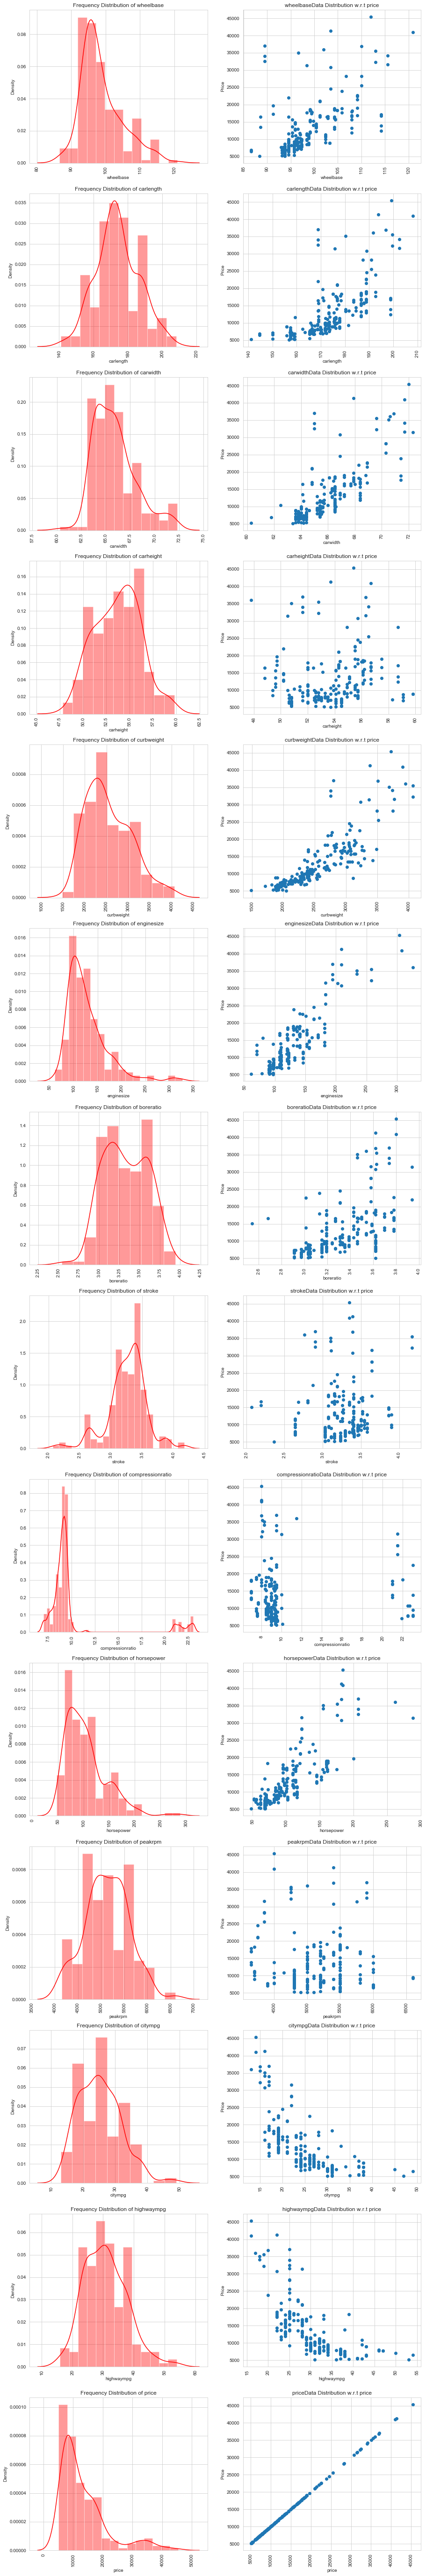

In [19]:
# Display of Distribution of each numerical feature
plt.figure(1,figsize=(15,100))
fig_idx= 0
for index,col in enumerate(col_name):
    fig_idx += 1 
    plt.subplot(14,2,fig_idx)
    # Distribution plot of the featrue
    sns.distplot(auto_df[col], color= 'r')
    plt.xticks(rotation = 90)
    plt.title('Frequency Distribution of ' + col )
    plt.ylabel('Density')
    
    fig_idx += 1
    plt.subplot(14,2,fig_idx)
    # Data Distribution ( Scatter ) of the data points for the numerical feature
    # And to check the distribution wrt to Price
    plt.scatter(x = auto_df[col], y=auto_df.price)
    plt.xticks(rotation = 90)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(col + 'Data Distribution w.r.t ' + 'price' )

**Conclusion Driven**.
1. wheelbase : The Data Looks more or less normally ditributed
    - Wheelbase has a positive correlation w.r.t to price
2. carlength: The Data looks normally distributed,
    - carlength has a positive correlation w.r.t to price
3. carwidth: The Data looks normally distributed
    - carwidth has a positive correlation w.r.t to price
4. curbweight: The Data looks little positively skewed
    - curbweight has a positive correlation w.r.t to price
5. enginesize: The Data looks positively skewed
    - enginesize has a positive correlation w.r.t to price
6. boreratio: The Data looks like normally distributed
    - boreratio has a positive correlation w.r.t to price
7. Compress ratio the data is having spikes, which means the data is not uniformly distributed
8. horsepower: The data looks positively skewed
    - horsepower has a positive correlation w.r.t to price
9. citympg: The Data looks nearly normally distributed
    - citympg has a negative correlation w.r.t to price
10. highwaympg: The Data looks normally distributed
    - highwaympg has a negative correlation w.r.t to price

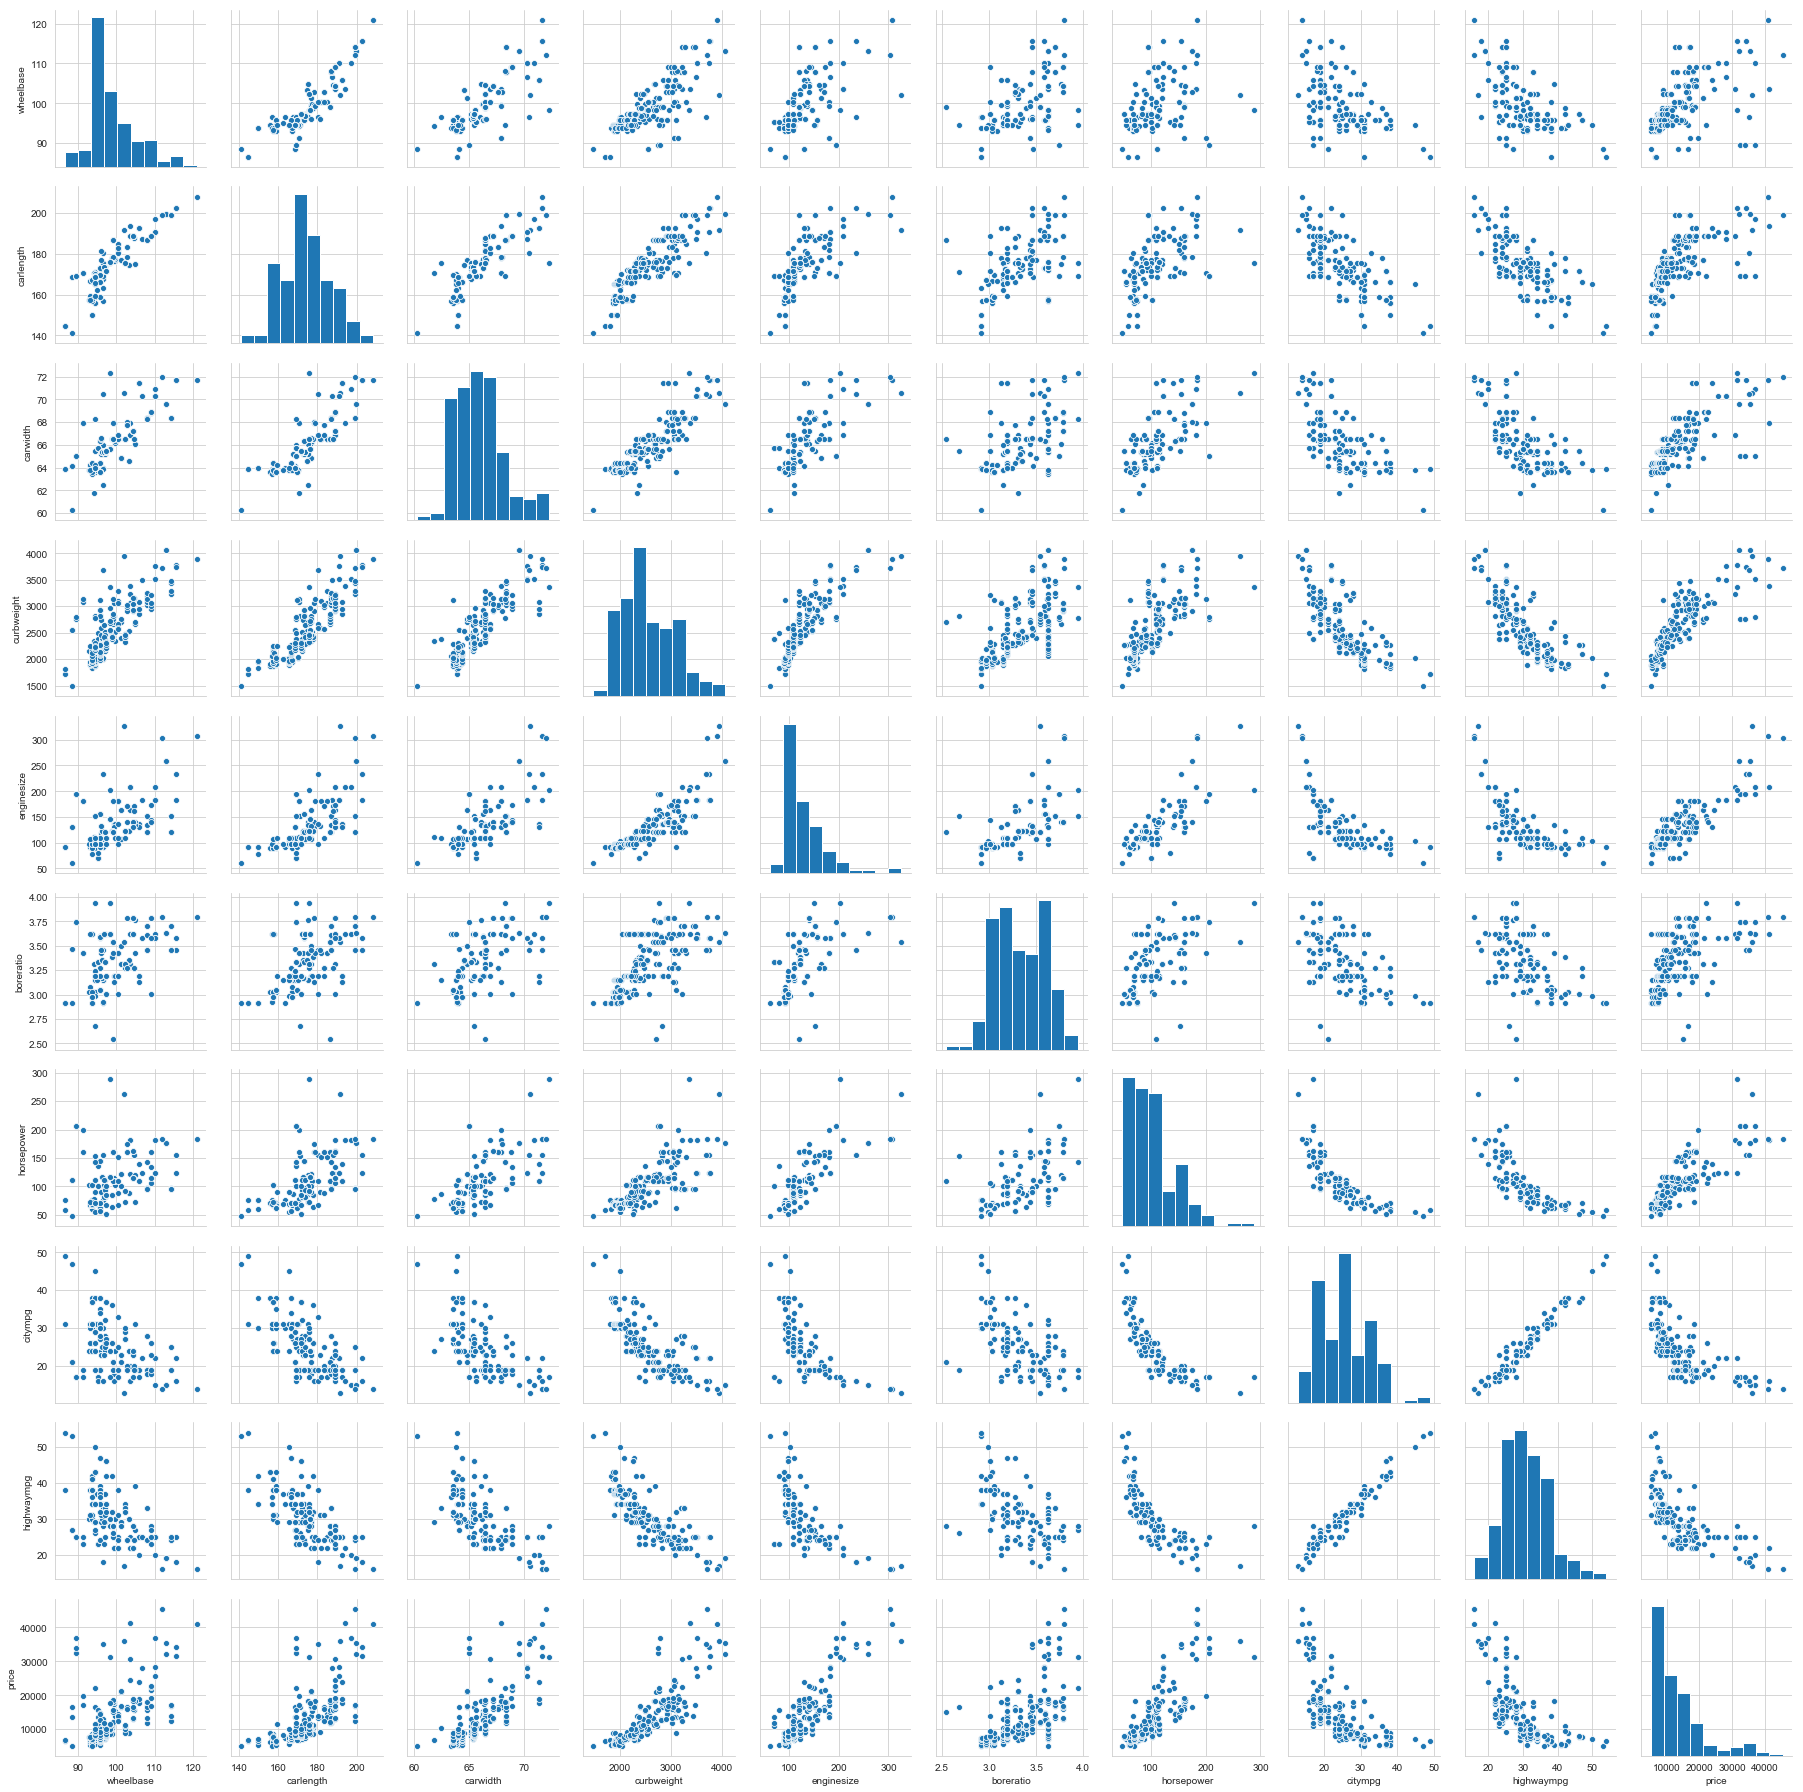

In [20]:
# Most significant Numerical Data types
col_name = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']
sns.pairplot(auto_df[col_name])
# As we can see below there are lot's of features are having high correlation which wrt to each other

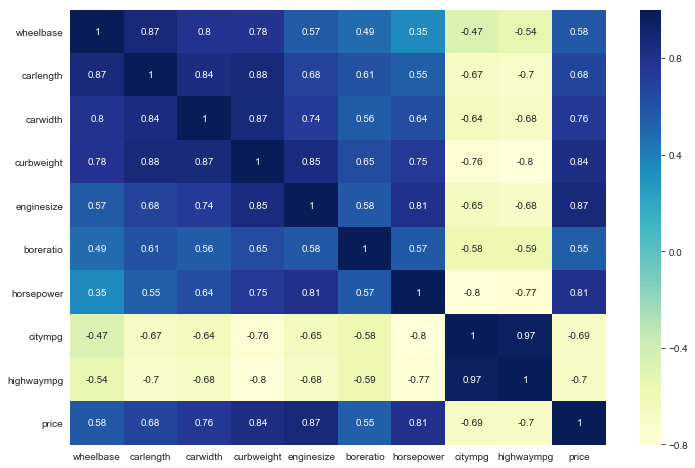

In [21]:
# For the identified columns we will plot the Heatmaps
plt.figure(figsize = (12, 8))
sns.heatmap(auto_df[col_name].corr(), annot = True, cmap="YlGnBu")
plt.show()

**Conclusion Driven**:
- We can see all the columns are having quite high correlation

#### Let's try to derive some new columns 

In [22]:
# So as to avoid Float Calculation
auto_df['price'] = auto_df['price'].astype('int') 

# Let's try to find the Average value per car company
# Then we will bin the CarComapny wise whether it's high or low or medium
temp_df = (auto_df.groupby(['CarCompany'])['price'].mean()).reset_index()
bins_range = [0,10000,20000,35000]
labels = ['Low', 'Medium', 'High']
auto_df = auto_df.merge(temp_df, how='left',on='CarCompany')
auto_df.head()
auto_df['PriceRange'] = pd.cut(auto_df['price_y'], bins = bins_range, right = True, labels= labels )
auto_df.drop('price_y', axis = 1, inplace = True)
auto_df.rename({'price_x':'price'}, axis = 1, inplace = True)
auto_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel,PriceRange
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,giulia,Medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,stelvio,Medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,Quadrifoglio,Medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,audi,100 ls,Medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,audi,100ls,Medium


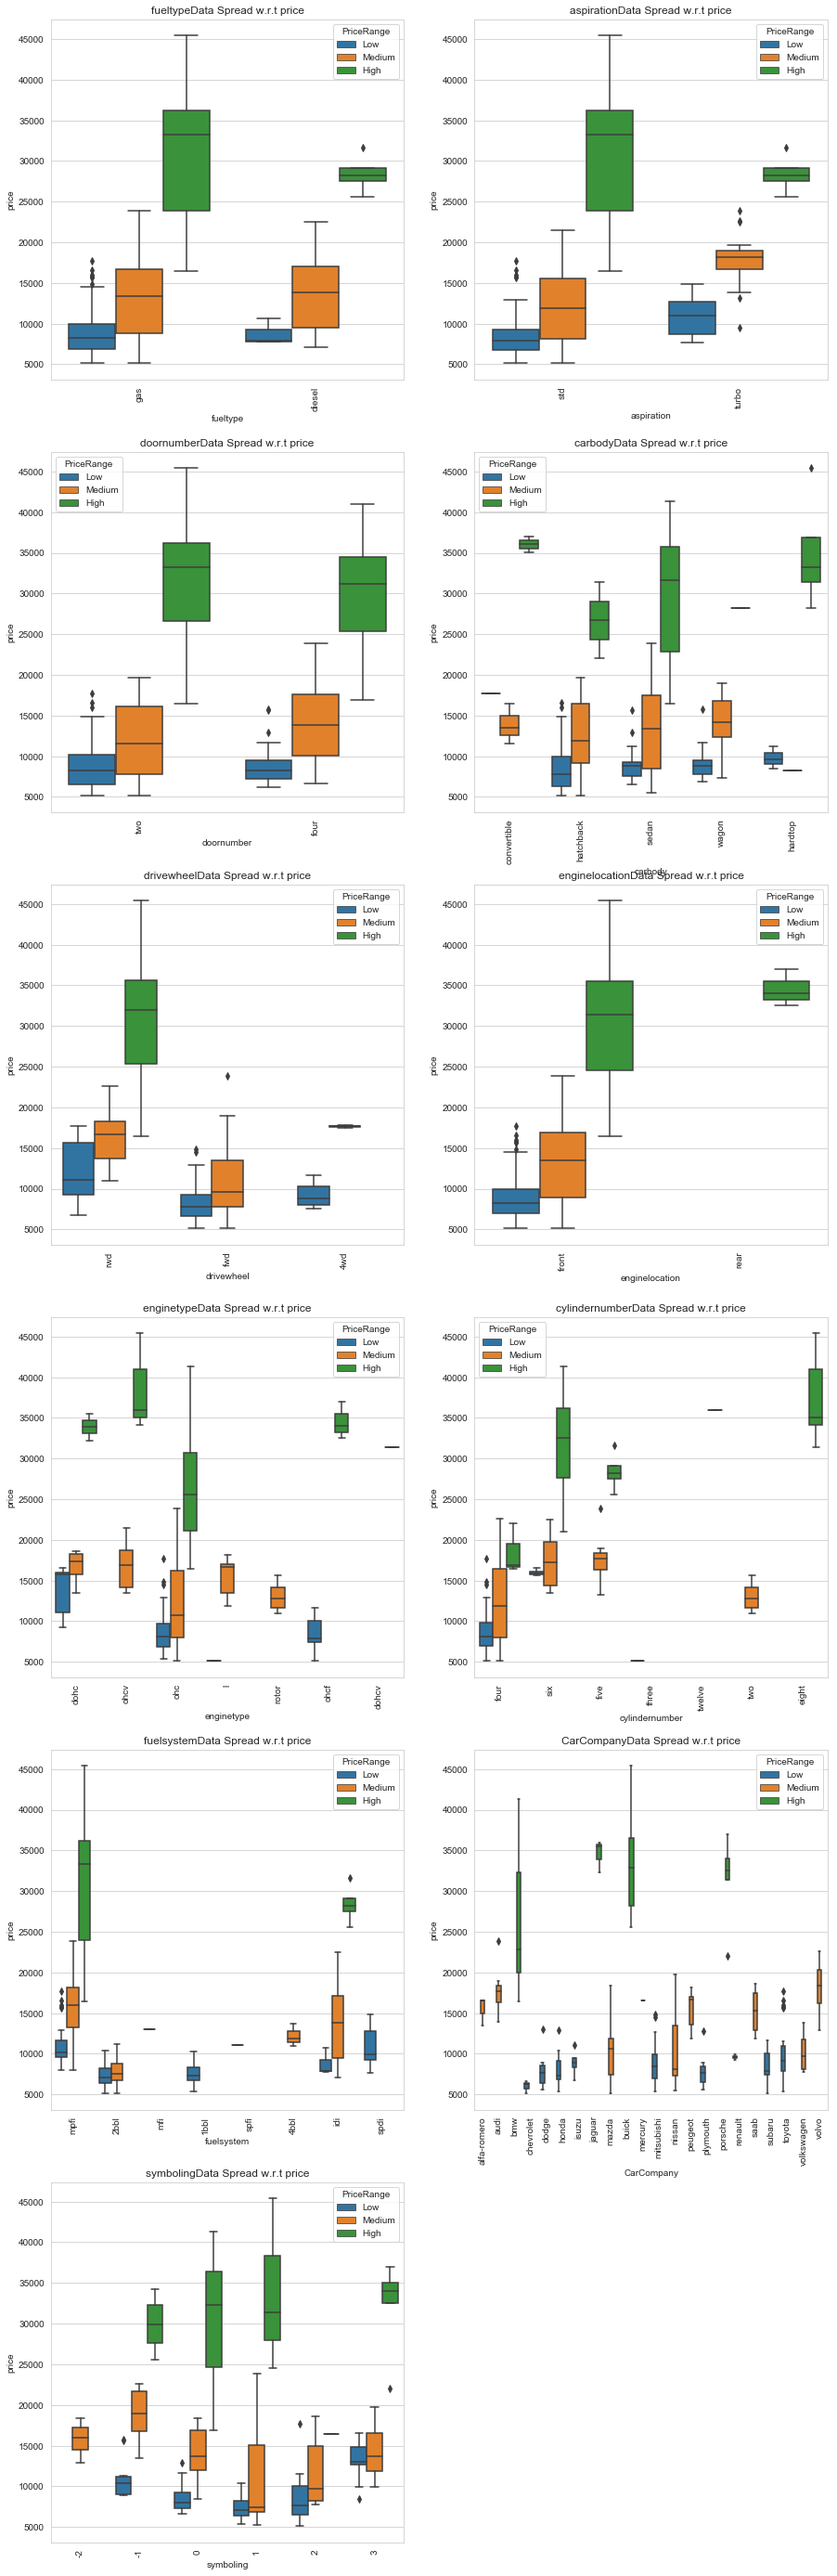

In [23]:
# This is to analyze the Categorical Columns wrt to Price
col_name = auto_df.select_dtypes(include=['object']).columns.tolist()
col_name.remove('CarModel')
col_name.append('symboling')
plt.figure(1,figsize=(15,50))
fig_idx= 0
for index,col in enumerate(col_name):
    fig_idx += 1 
    # Plot the Boxplot for the individual category wrt to price and then group by Price Range
    sns.boxplot(x = auto_df[col], y=auto_df.price,hue = auto_df['PriceRange'],ax = plt.subplot(6,2,fig_idx))
    plt.xticks(rotation = 90)
    plt.title(col + 'Data Spread w.r.t ' + 'price' )

**Conclusion Driven**:
1. Fueltype as Gas has a big price range and usually they are costly
2. Car having doornumber as two is costlier compared to others
3. Convertible is the costliest of all, then comes hardtop, sedan and hardback
4. rwd is costlier compared to other wd
5. Engine location rear is costlier as compared to front
6. For cylinder number as we can see more is the cylinder more is the price
7. Bmw, Porsche, Buick and Jaguar are the costliest brand
8. There are very cars are there for Symbolling as 3 but mostly costly cars are between -1 - 1

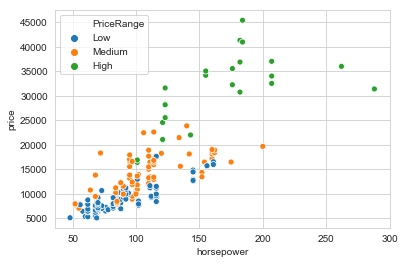

In [24]:
# This to plot the Horsepower wrt to price and then group it by average price of the Car company
sns.scatterplot(x = auto_df['horsepower'], y = auto_df['price'], hue= auto_df['PriceRange'])

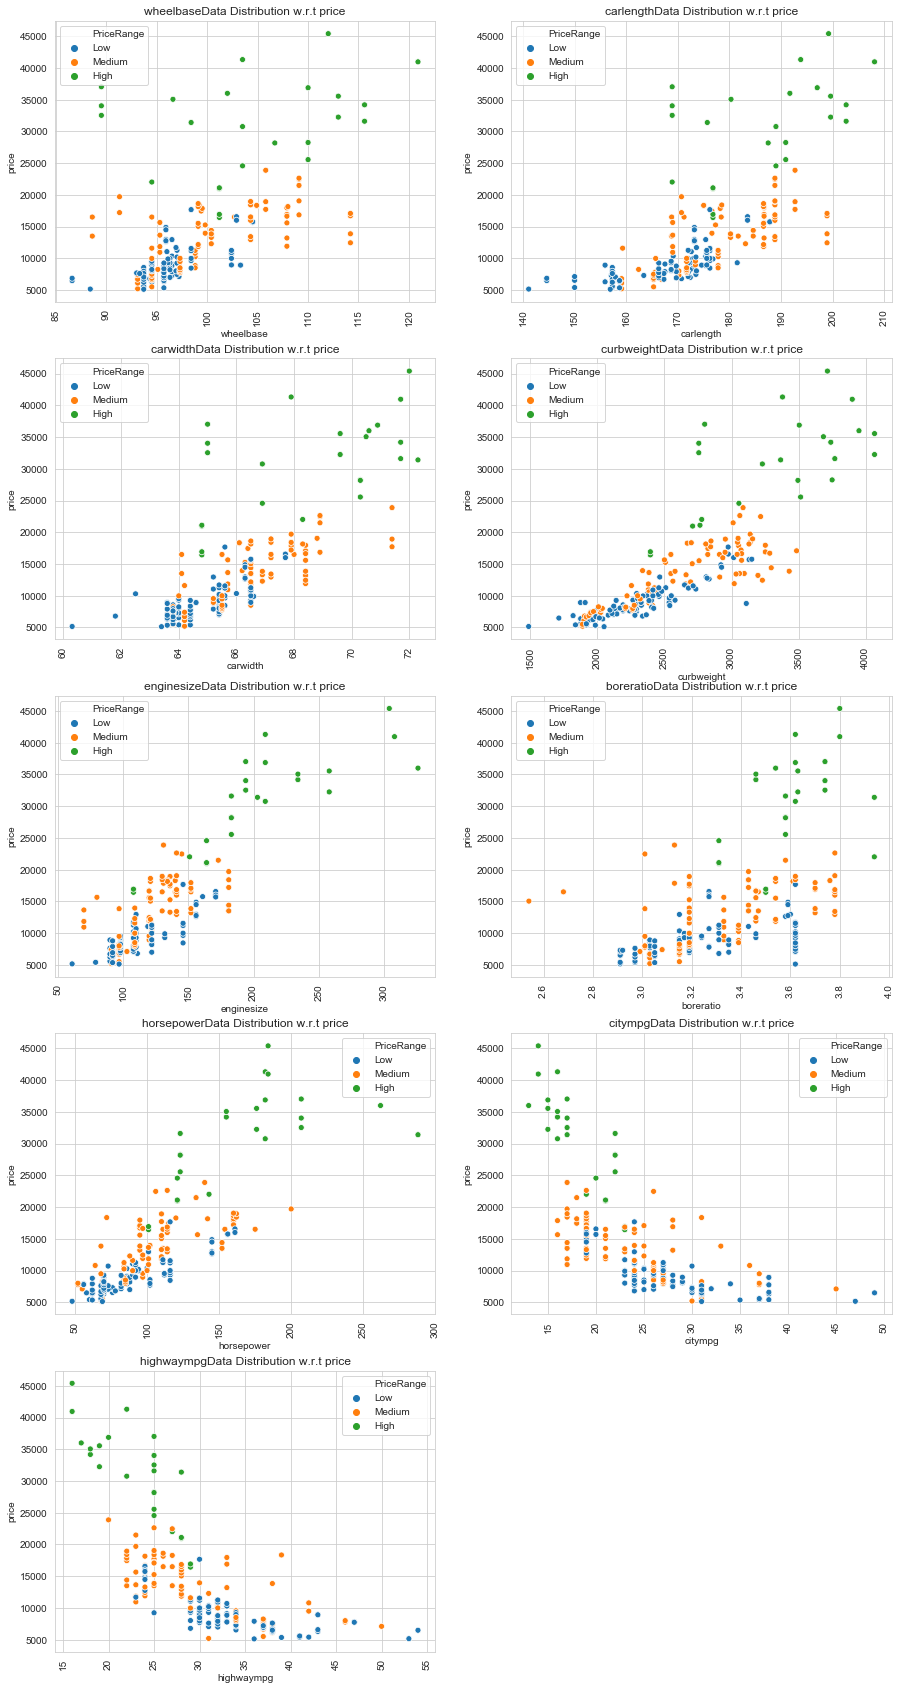

In [25]:
#Only the Numerical column names which have a high correlation wrt to price
col_name = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']
plt.figure(1,figsize=(15,30))
fig_idx= 0
for index,col in enumerate(col_name):
    fig_idx += 1 
    sns.scatterplot(x = auto_df[col], y=auto_df.price,hue = auto_df['PriceRange'],ax = plt.subplot(5,2,fig_idx))
    plt.xticks(rotation = 90)
    plt.title(col + 'Data Distribution w.r.t ' + 'price' )

## This graph is to draw more intuition regarding the distribion of features wrt to price and then wrt to Price Range

### Creating Dummies

In [26]:
#This is to capture the Data Frame as now the Data Prepation + Feature engineering will
auto_df_temp = auto_df

In [27]:
# Forming up the list of categories which has two categories and more than that
# symbolling is a categorical column so changing the data type
auto_df['symboling'] = auto_df['symboling'].astype('object' )
col_list = auto_df.select_dtypes(include=['object','category']).columns.tolist()
two_col_list = []
dummies_list = []
for col in col_list:
    if len(auto_df[col].value_counts().index) <= 2:
        two_col_list.append(col)
    else:
        dummies_list.append(col)
print("Categories with less than two or less values: {}".format(two_col_list))
print("Categories with less than two or less values: {}".format(dummies_list))

Categories with less than two or less values: ['fueltype', 'aspiration', 'doornumber', 'enginelocation']
Categories with less than two or less values: ['symboling', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany', 'CarModel', 'PriceRange']


In [28]:
# For the categories which has has less or equal to 2 we will use Label Encoding
le = LabelEncoder()
for col in two_col_list:
    auto_df[col] = le.fit_transform(auto_df[col])
auto_df[two_col_list].head()

,fueltype,aspiration,doornumber,enginelocation
0,1,0,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,0,0
4,1,0,0,0


In [29]:
# For the ones which has more than two labels we will use the get dummies
auto_df = pd.get_dummies(auto_df, columns= dummies_list)
new_dumm_cols = [col for col in auto_df.columns if col not in auto_df_temp.columns.tolist()]
new_dumm_cols

['symboling_-2',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_three',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_1bbl',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'CarCompany_alfa-romero',
 'CarCompany_audi',
 'CarCompany_bmw',
 'CarCompany_buick',
 'CarCompany_chevrolet',
 'CarCompany_dodge',
 'CarCompany_honda',
 'CarCompany_isuzu',
 'CarCompany_jaguar',
 'CarCompany_mazda',
 'CarCompany_mercury',
 'CarCompany_mitsubishi',
 'CarCompa

In [30]:
# After Creating Dummies, as we can see after the Dummies 
auto_df.shape

(205, 221)

**Conclusion Driven**: As we can see there are there is a drastic increase in the number of columns, and car models is more specific to car Company, so as we are including the Car Company we can now think of dropping the CarModel company

In [31]:
#Droppping the CarModel's related cols
# As we can see below there is a drastic decrease in the number of columns
cols_to_drop = [col for col in new_dumm_cols if 'CarModel' in col]
auto_df.drop(cols_to_drop, axis = 1, inplace= True)
auto_df.shape

(205, 80)

In [32]:
auto_df.head()

,car_ID,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,PriceRange_Low,PriceRange_Medium,PriceRange_High
0,1,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
1,2,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
2,3,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,1,0
3,4,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,1,0
4,5,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,1,0


In [33]:
# as car_ID is not an important columns
auto_df.drop('car_ID', axis = 1, inplace = True)

### Creating Train Test Dataset and do Scalling

In [34]:
# Splitting the Data set into Independent and Dependent Variables
col_list = auto_df.columns.tolist()
col_list.remove('price')
y = auto_df['price']
X = auto_df[col_list]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 )

In [36]:
# Getting only the Columns which is not label encoded or on which Dummies are not performed on
scaler = MinMaxScaler()
col_list_scale = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg' ]
X_train[col_list_scale] = scaler.fit_transform(X_train[col_list_scale])
X_test[col_list_scale] = scaler.transform(X_test[col_list_scale])

In [37]:
# Price also have a huge Range
y_train = scaler.fit_transform(y_train.values.reshape((-1,1)))
y_test = scaler.transform(y_test.values.reshape((-1,1)))

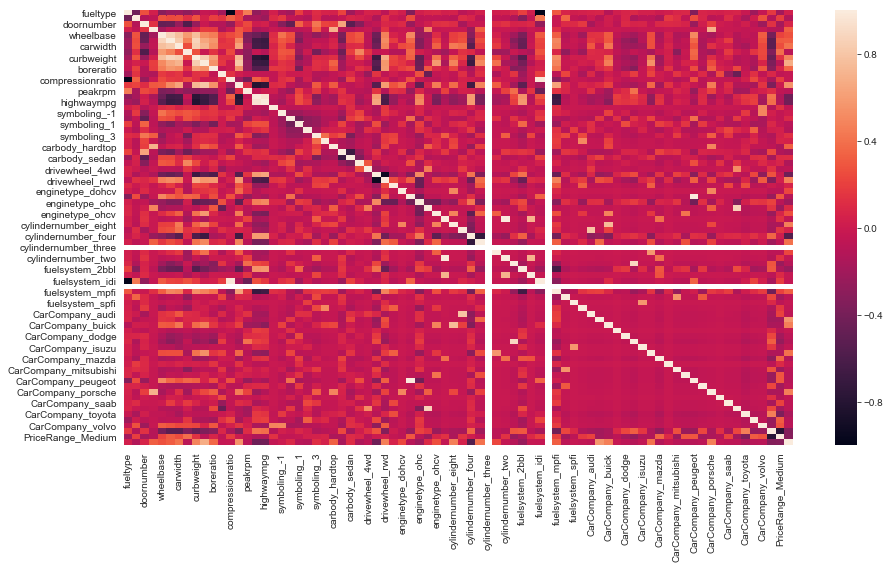

In [45]:
# Plotting the Correlation Matrice and then see the plot
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr())

# As we can see there are some features named wheelbase, carwidth, curbweight, boreratio, 
# they have a high correlation with each other

### Model Building
Using Statsmodel for building the model

#### Model 1

In [46]:
# Let's first use all the feature and see the perfomance of the Model
X_train_sm = sm.add_constant(X_train)
lr_model_1 = sm.OLS(y_train, X_train_sm).fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     59.08
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.62e-48
Time:                        12:00:53   Log-Likelihood:                 306.69
No. Observations:                 143   AIC:                            -487.4
Df Residuals:                      80   BIC:                            -300.7
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0422      0.056     -0.753      0.454      -0.154       0.069
fueltype                   0.0355      0.069      0.516      0.607      -0.101       0.172
aspiration                 0.0550      0.022      2.450      0.016       0.010       0.100
doornumber                -0.0103      0.015     -0.668      0.506      -0.041       0.020
enginelocation             0.0971      0.046      2.092      0.040       0.005       0.190
wheelbase                  0.0354      0.099      0.358      0.721      -0.162       0.232
carlength                 -0.0762      0.096     -0.797      0.428      -0.266       0.114
carwidth                   0.1660      0.068      2.457      0.016       0.032       0.301
carheight                 -0.0269      0.049     -0.553      0.582      -0.124       0.070
curbweight                 0.2659      0.111      2.387      0.019       0.044       0.488
enginesize                 0.4877      0.184      2.653      0.010       0.122       0.854
boreratio                 -0.0687      0.072     -0.961      0.340      -0.211       0.074
stroke                    -0.0504      0.059     -0.849      0.399      -0.169       0.068
compressionratio           0.1451      0.239      0.608      0.545      -0.330       0.620
horsepower                 0.1651      0.154      1.071      0.287      -0.142       0.472
peakrpm                    0.1115      0.046      2.421      0.018       0.020       0.203
citympg                    0.0219      0.096      0.227      0.821      -0.170       0.214
highwaympg                 0.0085      0.102      0.084      0.934      -0.194       0.211
symboling_-2              -0.0056      0.033     -0.170      0.865      -0.071       0.060
symboling_-1               0.0069      0.019      0.366      0.715      -0.030       0.044
symboling_0               -0.0011      0.017     -0.069      0.945      -0.034       0.032
symboling_1                0.0030      0.016      0.184      0.854      -0.029       0.035
symboling_2               -0.0224      0.021     -1.075      0.286      -0.064       0.019
symboling_3               -0.0229      0.022     -1.023      0.310      -0.067       0.022
carbody_convertible        0.0414      0.028      1.497      0.138      -0.014       0.097
carbody_hardtop            0.0368      0.034      1.067      0.289      -0.032       0.105
carbody_hatchback         -0.0302      0.014     -2.094      0.039      -0.059      -0.001
carbody_sedan             -0.0351      0.016     -2.198      0.031      -0.067      -0.003
carbody_wagon             -0.0551      0.020     -2.714      0.008      -0.095      -0.015
drivewheel_4wd             0.0076      0.025      0.299      0.765      -0.043       0.058
drivewheel_fwd            -0.0169      0.022     -0.751      0.455      -0.062  

**Conclusion Driven**
1. R Squared values is 97.9% which is quite high
2. There are certain coefficient which are nearly 0
3. There are also some feature for which there is a high P Value i.e. >0.05

In [47]:
def _deter_vif(X):
    """
    This Function Determines the VIFs for the set of column which is present in the X Data Frame
    Then it will calculate the VIF Scores for each columns and then
    it will print all the VIFs for which VIF score is not INF
    """
    vif = pd.DataFrame()
    vif['columns'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    # There are certain colums for which VIF is coming as inf
    # as per https://pvanb.wordpress.com/2016/04/25/vif-stepwise-variable-selection/
    # This basically comes when the features nearly does a perfect fit (R2 = 1) which results in an 
    # undefined VIF (denoted by inf in the table with results).
    print(vif[vif['VIF'] != np.inf])

In [48]:
_deter_vif(X_train_sm)
# There are certain columns for which there is a high VIF > 10,
# So this not a perfect model we need to rework on the same and then we can find an ideal model

                 columns     VIF
13      compressionratio  308.49
10            enginesize   87.60
14            horsepower   68.68
9             curbweight   66.34
16               citympg   51.53
5              wheelbase   42.51
17            highwaympg   41.48
6              carlength   41.32
7               carwidth   19.51
11             boreratio   19.14
8              carheight   10.01
15               peakrpm    8.30
2             aspiration    7.68
12                stroke    7.47
3             doornumber    5.80
0                  const    0.00
43  cylindernumber_three     NaN
50        fuelsystem_mfi     NaN


In [49]:
def _plot_error_term(lr_model, X_sm, y):
    """
    This is do analysis on the error terms
    1. Histogram of the residual, so as to check whether it is Normal and whether it is centered around zero
    2. To plot the Scatter plot and to check whether it is having a cone shaped or not
    3. It plots the QQ PLots to checks whether the residual is a Normal Distribution
    4. This also prints the R Squared value 
    5. To check the Mean Squared Error value
    6. It's checks the Hetroscedacity using het_goldfeldquandt approach, this checks whether the two features have same variance
        i. This gives Two Values F Statistics
        ii. P Values, if the P Values is > 0.05 then the variance is same 
    """
    # To check the distribution of the error term for the Train 
    plt.figure(figsize=(15, 5))
    y_pred = lr_model.predict(X_sm)
    error_data = y.reshape(-1) - y_pred.values
    sns.distplot(error_data,ax = plt.subplot(1,3,1), hist= False)
    plt.title('Error Distribution')
    # The error term doesn't looks like nearly normally distributed

    sns.scatterplot(x = y.reshape(-1), y = y_pred.values,ax = plt.subplot(1,3,2) )
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Value')
    
    sm.qqplot(error_data, ax = plt.subplot(1,3,3), line='s')
    plt.title('QQ Plot to check the Normality')
    plt.show()
    
    print("R2 Score {}".format(r2_score(y, y_pred)))
    print("Mean Squared Error is {}".format(mean_squared_error(y, y_pred)))
    
    print("====== To check the Hetroscedacity ======")
    print("F-statistic : {}".format(round(dg.het_goldfeldquandt(y = y_pred, x = y )[0],4)))
    print("P value : {}".format(round(dg.het_goldfeldquandt(y = y_pred, x = y )[1],4)))
    print("=========================================")

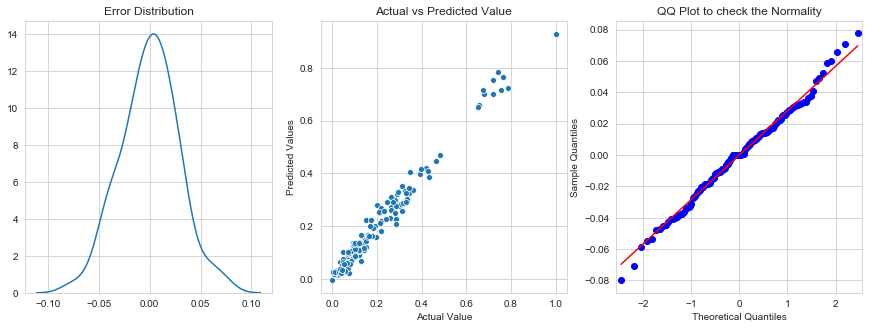

R2 Score 0.9786249618314702
Mean Squared Error is 0.0008028883533520757
====== To check the Hetroscedacity ======
F-statistic : 1.0189
P value : 0.4686


In [50]:
# Train Data Residual Analysis
_plot_error_term(lr_model_1, X_train_sm, y_train)

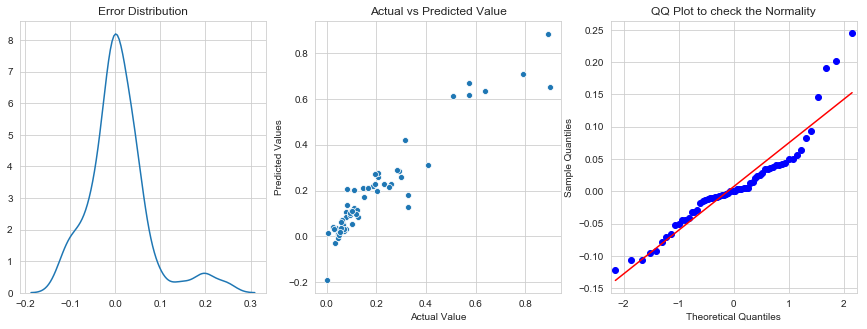

R2 Score 0.891410037339221
Mean Squared Error is 0.004636638157385918
====== To check the Hetroscedacity ======
F-statistic : 0.524
P value : 0.9591


In [51]:
# Test Data Residual Analysis
X_test_sm = sm.add_constant(X_test)
_plot_error_term(lr_model_1, X_test_sm, y_test)

**Conclusion Driven**
As we can see the Error is nearly normally distributed but in the scatter plot we can see the points are not tightly coupled like So we would like to improve this. 

#### Model 2
Let's try to build model using RFE and determine the features that contribute to the model building

In [52]:
# We are trying to get top 15 contributing Factors which to lead in building a good model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
rfe = RFE(linear_model, 15)
rfe = rfe.fit(X_train, y_train)

In [53]:
# To check the ranking of the columns and to also check which columns and selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
# This will show which columns are selected and what is their ranking

[('fueltype', True, 1),
 ('aspiration', False, 6),
 ('doornumber', False, 50),
 ('enginelocation', True, 1),
 ('wheelbase', False, 35),
 ('carlength', False, 26),
 ('carwidth', True, 1),
 ('carheight', False, 41),
 ('curbweight', True, 1),
 ('enginesize', False, 3),
 ('boreratio', True, 1),
 ('stroke', False, 4),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 7),
 ('citympg', False, 20),
 ('highwaympg', False, 54),
 ('symboling_-2', False, 62),
 ('symboling_-1', False, 52),
 ('symboling_0', False, 57),
 ('symboling_1', False, 56),
 ('symboling_2', False, 30),
 ('symboling_3', False, 28),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', False, 37),
 ('carbody_sedan', False, 36),
 ('carbody_wagon', False, 29),
 ('drivewheel_4wd', False, 32),
 ('drivewheel_fwd', False, 59),
 ('drivewheel_rwd', False, 42),
 ('enginetype_dohc', False, 61),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 46),
 ('enginetype_ohc', 

In [54]:
# To get the columns names which are selected
X_train.columns[rfe.support_]

Index(['fueltype', 'enginelocation', 'carwidth', 'curbweight', 'boreratio',
       'compressionratio', 'horsepower', 'carbody_convertible',
       'carbody_hardtop', 'enginetype_dohcv', 'enginetype_ohcv',
       'cylindernumber_eight', 'cylindernumber_twelve', 'fuelsystem_idi',
       'PriceRange_High'],
      dtype='object')

In [55]:
# Columns which are not selected
X_train.columns[~rfe.support_]

Index(['aspiration', 'doornumber', 'wheelbase', 'carlength', 'carheight',
       'enginesize', 'stroke', 'peakrpm', 'citympg', 'highwaympg',
       'symboling_-2', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CarCompany_alfa-romero', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_dodge', 'CarCompany_honda', 'CarCompany_isuzu',
       'CarCompany_jaguar', 'CarCompany_mazda', 'CarCompany_mercury',
      

In [56]:
X_train.columns[rfe.support_].tolist()

['fueltype',
 'enginelocation',
 'carwidth',
 'curbweight',
 'boreratio',
 'compressionratio',
 'horsepower',
 'carbody_convertible',
 'carbody_hardtop',
 'enginetype_dohcv',
 'enginetype_ohcv',
 'cylindernumber_eight',
 'cylindernumber_twelve',
 'fuelsystem_idi',
 'PriceRange_High']

In [57]:
# Get the selected Features and then build the model on top of it
X_train_rfe = X_train[X_train.columns[rfe.support_].tolist()]
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_model_2 = sm.OLS(y_train, X_train_rfe_sm).fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     206.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.45e-80
Time:                        12:19:06   Log-Likelihood:                 257.72
No. Observations:                 143   AIC:                            -485.4
Df Residuals:                     128   BIC:                            -441.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1220      0.039     -3.118      0.002      -0.199      -0.045
fueltype                  0.0483      0.024      2.018      0.046       0.001       0.096
enginelocation            0.0806      0.050      1.626      0.107      -0.018       0.179
carwidth                  0.2474      0.036      6.947      0.000       0.177       0.318
curbweight                0.2218      0.040      5.480      0.000       0.142       0.302
boreratio                -0.0843      0.025     -3.311      0.001      -0.135      -0.034
compressionratio          0.2892      0.101      2.859      0.005       0.089       0.489
horsepower                0.3986      0.052      7.668      0.000       0.296       0.501
carbody_convertible       0.0831      0.021      3.976      0.000       0.042       0.124
carbody_hardtop           0.0853      0.034      2.517      0.013       0.018       0.152
enginetype_dohcv         -0.3829      0.070     -5.457      0.000      -0.522      -0.244
enginetype_ohcv          -0.0643      0.023     -2.832      0.005      -0.109      -0.019
cylindernumber_eight      0.1361      0.041      3.356      0.001       0.056       0.216
cylindernumber_twelve    -0.0933      0.054     -1.734      0.085      -0.200       0.013
fuelsystem_idi           -0.1703      0.062     -2.755      0.007      -0.293      -0.048
PriceRange_High           0.2044      0.015     13.209      0.000       0.174       0.235
==============================================================================
Omnibus:                        8.174   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               12.187
Skew:                           0.272   Prob(JB):                      0.00226
Kurtosis:                       4.322   Cond. No.                     5.18e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Conclusion Driven**:
1. RSquared Values is around 95.8 % and the adjusted R2 Square is 95.3% so there is a very less signifiacant drop when we have removed so many columns
2. F Statistic is high compared to previous model
3. enginelocation has a high p value

In [58]:
# Lets try to check the VIF Score and then see how does it look
_deter_vif(X_train_rfe)

                  columns    VIF
13         fuelsystem_idi  68.35
5        compressionratio  44.72
0                fueltype  28.43
3              curbweight   7.07
6              horsepower   6.30
2                carwidth   4.37
11   cylindernumber_eight   3.59
9        enginetype_dohcv   2.75
1          enginelocation   2.72
8         carbody_hardtop   2.51
10        enginetype_ohcv   2.44
14        PriceRange_High   2.02
4               boreratio   1.96
12  cylindernumber_twelve   1.61
7     carbody_convertible   1.19


**Conclusion Driven**:
There are other variables which has a VIF Values, so what we can do is we can have a look how the coefficient and VIF values change when we drop enginelocation

#### Model 3

In [59]:
# Dropping the feature
X_train_rfe_sm.drop('enginelocation', inplace = True, axis = 1)
lr_model_3 = sm.OLS(y_train, X_train_rfe_sm).fit()
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     219.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.51e-81
Time:                        12:20:43   Log-Likelihood:                 256.25
No. Observations:                 143   AIC:                            -484.5
Df Residuals:                     129   BIC:                            -443.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1272      0.039     -3.241      0.002      -0.205      -0.050
fueltype                  0.0507      0.024      2.109      0.037       0.003       0.098
carwidth                  0.2417      0.036      6.776      0.000       0.171       0.312
curbweight                0.2120      0.040      5.263      0.000       0.132       0.292
boreratio                -0.0847      0.026     -3.304      0.001      -0.135      -0.034
compressionratio          0.3069      0.101      3.033      0.003       0.107       0.507
horsepower                0.4261      0.049      8.617      0.000       0.328       0.524
carbody_convertible       0.0850      0.021      4.044      0.000       0.043       0.127
carbody_hardtop           0.1190      0.027      4.415      0.000       0.066       0.172
enginetype_dohcv         -0.3920      0.070     -5.570      0.000      -0.531      -0.253
enginetype_ohcv          -0.0679      0.023     -2.988      0.003      -0.113      -0.023
cylindernumber_eight      0.1243      0.040      3.096      0.002       0.045       0.204
cylindernumber_twelve    -0.1076      0.053     -2.016      0.046      -0.213      -0.002
fuelsystem_idi           -0.1779      0.062     -2.868      0.005      -0.301      -0.055
PriceRange_High           0.2102      0.015     13.858      0.000       0.180       0.240
==============================================================================
Omnibus:                        9.067   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               19.592
Skew:                          -0.027   Prob(JB):                     5.57e-05
Kurtosis:                       4.813   Cond. No.                     5.14e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Conclusion Driven**:
1. There is a very less significant drop in the R2 Squared value
2. F Statistic have increased and 
3. Some of the Pvalues have decreased and there is not so much significant change in the Coefficient values
4. cylindernumber_twelve has a little bit high P Values so we will drop it

We will analyze now more with P values + VIF

In [60]:
# Lets try to check the VIF Score and then see how does it look
_deter_vif(X_train_rfe_sm)

                  columns    VIF
5        compressionratio  44.20
3              curbweight   6.91
6              horsepower   5.63
2                carwidth   4.33
11   cylindernumber_eight   3.48
9        enginetype_dohcv   2.73
10        enginetype_ohcv   2.42
4               boreratio   1.96
14        PriceRange_High   1.91
8         carbody_hardtop   1.57
12  cylindernumber_twelve   1.57
7     carbody_convertible   1.18
0                   const   0.00


#### Model 4

In [61]:
# We will give upper hand to Pvalues
# Dropping the feature
X_train_rfe_sm.drop('cylindernumber_twelve', inplace = True, axis = 1)
lr_model_4 = sm.OLS(y_train, X_train_rfe_sm).fit()
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     231.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.66e-81
Time:                        12:21:16   Log-Likelihood:                 254.04
No. Observations:                 143   AIC:                            -482.1
Df Residuals:                     130   BIC:                            -443.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0973      0.037     -2.647      0.009      -0.170      -0.025
fueltype                 0.0343      0.023      1.498      0.136      -0.011       0.080
carwidth                 0.2388      0.036      6.623      0.000       0.167       0.310
curbweight               0.2151      0.041      5.282      0.000       0.134       0.296
boreratio               -0.0840      0.026     -3.238      0.002      -0.135      -0.033
compressionratio         0.2292      0.095      2.421      0.017       0.042       0.416
horsepower               0.4040      0.049      8.282      0.000       0.307       0.500
carbody_convertible      0.0859      0.021      4.040      0.000       0.044       0.128
carbody_hardtop          0.1288      0.027      4.802      0.000       0.076       0.182
enginetype_dohcv        -0.3765      0.071     -5.319      0.000      -0.516      -0.236
enginetype_ohcv         -0.0767      0.023     -3.402      0.001      -0.121      -0.032
cylindernumber_eight     0.1357      0.040      3.374      0.001       0.056       0.215
fuelsystem_idi          -0.1316      0.058     -2.257      0.026      -0.247      -0.016
PriceRange_High          0.2065      0.015     13.556      0.000       0.176       0.237
==============================================================================
Omnibus:                        9.580   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               21.720
Skew:                          -0.002   Prob(JB):                     1.92e-05
Kurtosis:                       4.909   Cond. No.                     5.35e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Conclusion Driven**:
1. R Squared values didn't dropped so much as well as adjusted r squared
2. But now the p Values of fueltype has significantly increased

So we will drop the fueltype from the list
#### Model 5

In [62]:
# We will give upper hand to Pvalues
# Dropping the feature
X_train_rfe_sm.drop('fueltype', inplace = True, axis = 1)
lr_model_5 = sm.OLS(y_train, X_train_rfe_sm).fit()
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     231.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.66e-81
Time:                        12:21:40   Log-Likelihood:                 254.04
No. Observations:                 143   AIC:                            -482.1
Df Residuals:                     130   BIC:                            -443.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0630      0.019     -3.363      0.001      -0.100      -0.026
carwidth                 0.2388      0.036      6.623      0.000       0.167       0.310
curbweight               0.2151      0.041      5.282      0.000       0.134       0.296
boreratio               -0.0840      0.026     -3.238      0.002      -0.135      -0.033
compressionratio         0.2292      0.095      2.421      0.017       0.042       0.416
horsepower               0.4040      0.049      8.282      0.000       0.307       0.500
carbody_convertible      0.0859      0.021      4.040      0.000       0.044       0.128
carbody_hardtop          0.1288      0.027      4.802      0.000       0.076       0.182
enginetype_dohcv        -0.3765      0.071     -5.319      0.000      -0.516      -0.236
enginetype_ohcv         -0.0767      0.023     -3.402      0.001      -0.121      -0.032
cylindernumber_eight     0.1357      0.040      3.374      0.001       0.056       0.215
fuelsystem_idi          -0.1659      0.081     -2.059      0.042      -0.325      -0.006
PriceRange_High          0.2065      0.015     13.556      0.000       0.176       0.237
==============================================================================
Omnibus:                        9.580   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               21.720
Skew:                          -0.002   Prob(JB):                     1.92e-05
Kurtosis:                       4.909   Cond. No.                         47.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion Driven**:
1. There no much drop in R squared and Adjusted R Squared
2. we can drop the column fuelsystem_idi as it has a high p value

#### Model 5

In [63]:
# We will give upper hand to Pvalues
# Dropping the feature
X_train_rfe_sm.drop('fuelsystem_idi', inplace = True, axis = 1)
lr_model_5 = sm.OLS(y_train, X_train_rfe_sm).fit()
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     246.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           8.21e-82
Time:                        12:21:55   Log-Likelihood:                 251.74
No. Observations:                 143   AIC:                            -479.5
Df Residuals:                     131   BIC:                            -443.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0358      0.013     -2.665      0.009      -0.062      -0.009
carwidth                 0.2438      0.036      6.696      0.000       0.172       0.316
curbweight               0.1939      0.040      4.861      0.000       0.115       0.273
boreratio               -0.0874      0.026     -3.337      0.001      -0.139      -0.036
compressionratio         0.0381      0.019      2.037      0.044       0.001       0.075
horsepower               0.4036      0.049      8.175      0.000       0.306       0.501
carbody_convertible      0.0901      0.021      4.207      0.000       0.048       0.132
carbody_hardtop          0.1345      0.027      4.980      0.000       0.081       0.188
enginetype_dohcv        -0.3435      0.070     -4.922      0.000      -0.482      -0.205
enginetype_ohcv         -0.0660      0.022     -2.970      0.004      -0.110      -0.022
cylindernumber_eight     0.1177      0.040      2.962      0.004       0.039       0.196
PriceRange_High          0.2133      0.015     14.181      0.000       0.184       0.243
==============================================================================
Omnibus:                       10.229   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               22.707
Skew:                           0.143   Prob(JB):                     1.17e-05
Kurtosis:                       4.931   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion Driven**:
1. There no much drop in R squared and Adjusted R Squared
2. F Statistic have increased
3. we can drop the column compressionratio as it has a high p value

#### Model 6

In [64]:
# We will give upper hand to Pvalues
# Dropping the feature
X_train_rfe_sm.drop('compressionratio', inplace = True, axis = 1)
lr_model_6 = sm.OLS(y_train, X_train_rfe_sm).fit()
lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     264.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.76e-82
Time:                        12:22:09   Log-Likelihood:                 249.51
No. Observations:                 143   AIC:                            -477.0
Df Residuals:                     132   BIC:                            -444.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0282      0.013     -2.159      0.033      -0.054      -0.002
carwidth                 0.2549      0.036      6.997      0.000       0.183       0.327
curbweight               0.2168      0.039      5.599      0.000       0.140       0.293
boreratio               -0.0910      0.026     -3.440      0.001      -0.143      -0.039
horsepower               0.3535      0.043      8.161      0.000       0.268       0.439
carbody_convertible      0.0911      0.022      4.205      0.000       0.048       0.134
carbody_hardtop          0.1461      0.027      5.471      0.000       0.093       0.199
enginetype_dohcv        -0.2993      0.067     -4.460      0.000      -0.432      -0.167
enginetype_ohcv         -0.0600      0.022     -2.693      0.008      -0.104      -0.016
cylindernumber_eight     0.0972      0.039      2.499      0.014       0.020       0.174
PriceRange_High          0.2161      0.015     14.251      0.000       0.186       0.246
==============================================================================
Omnibus:                       10.017   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               23.317
Skew:                           0.055   Prob(JB):                     8.65e-06
Kurtosis:                       4.975   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion Driven**:
1. There no much drop in R squared and Adjusted R Squared
2. F Statistic have increased
3. we can drop the column cylindernumber_eight as it has a high p value compared to others

#### Model 7

In [65]:
# We will give upper hand to Pvalues
# Dropping the feature
X_train_rfe_sm.drop('cylindernumber_eight', inplace = True, axis = 1)
lr_model_7 = sm.OLS(y_train, X_train_rfe_sm).fit()
lr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     281.9
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.55e-82
Time:                        12:22:24   Log-Likelihood:                 246.21
No. Observations:                 143   AIC:                            -472.4
Df Residuals:                     133   BIC:                            -442.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0315      0.013     -2.380      0.019      -0.058      -0.005
carwidth                0.2845      0.035      8.101      0.000       0.215       0.354
curbweight              0.2091      0.039      5.314      0.000       0.131       0.287
boreratio              -0.0904      0.027     -3.355      0.001      -0.144      -0.037
horsepower              0.3146      0.041      7.634      0.000       0.233       0.396
carbody_convertible     0.1076      0.021      5.119      0.000       0.066       0.149
carbody_hardtop         0.1661      0.026      6.397      0.000       0.115       0.218
enginetype_dohcv       -0.1977      0.054     -3.632      0.000      -0.305      -0.090
enginetype_ohcv        -0.0285      0.019     -1.521      0.131      -0.065       0.009
PriceRange_High         0.2290      0.015     15.768      0.000       0.200       0.258
==============================================================================
Omnibus:                       12.045   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               33.522
Skew:                           0.004   Prob(JB):                     5.26e-08
Kurtosis:                       5.372   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion Driven**:
1. There is very less drop in R squared and Adjusted R Squared
2. F Statistic has also increased
3. P value of enginetype_ohcv have increased so we would drop that feature

#### Model 8

In [66]:
# We will give upper hand to Pvalues
# Dropping the feature
X_train_rfe_sm.drop('enginetype_ohcv', inplace = True, axis = 1)
lr_model_8 = sm.OLS(y_train, X_train_rfe_sm).fit()
lr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     313.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           7.79e-83
Time:                        12:24:00   Log-Likelihood:                 244.98
No. Observations:                 143   AIC:                            -472.0
Df Residuals:                     134   BIC:                            -445.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0324      0.013     -2.435      0.016      -0.059      -0.006
carwidth                0.2818      0.035      7.994      0.000       0.212       0.352
curbweight              0.2030      0.039      5.161      0.000       0.125       0.281
boreratio              -0.0783      0.026     -3.027      0.003      -0.130      -0.027
horsepower              0.2950      0.039      7.500      0.000       0.217       0.373
carbody_convertible     0.1041      0.021      4.957      0.000       0.063       0.146
carbody_hardtop         0.1648      0.026      6.318      0.000       0.113       0.216
enginetype_dohcv       -0.1822      0.054     -3.390      0.001      -0.288      -0.076
PriceRange_High         0.2288      0.015     15.674      0.000       0.200       0.258
==============================================================================
Omnibus:                       11.002   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               28.064
Skew:                           0.027   Prob(JB):                     8.05e-07
Kurtosis:                       5.170   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion Driven**:
1. There is very less drop in the R Squared and Adjusted R Sqaured
2. F Statistic score has increased
3. P Values for all the Features is nearly 0

So now let's have a look into the VIF Score

In [67]:
_deter_vif(X_train_rfe_sm)

               columns    VIF
0                const  12.43
2           curbweight   5.85
1             carwidth   3.75
4           horsepower   3.16
3            boreratio   1.77
8      PriceRange_High   1.57
7     enginetype_dohcv   1.41
6      carbody_hardtop   1.30
5  carbody_convertible   1.05


**Conclusion Driven**
curbweight has a high VIF > 5 compared to other Feature, so we would drop that Feature, as it can be an indication of Multiconllinearity     

In [68]:
# We will give upper hand to VIF 
# Dropping the feature
X_train_rfe_sm.drop('curbweight', inplace = True, axis = 1)
lr_model_9 = sm.OLS(y_train, X_train_rfe_sm).fit()
lr_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     298.2
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           7.94e-79
Time:                        12:24:45   Log-Likelihood:                 232.01
No. Observations:                 143   AIC:                            -448.0
Df Residuals:                     135   BIC:                            -424.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0586      0.013     -4.376      0.000      -0.085      -0.032
carwidth                0.4088      0.028     14.849      0.000       0.354       0.463
boreratio              -0.0399      0.027     -1.476      0.142      -0.093       0.014
horsepower              0.3912      0.038     10.358      0.000       0.317       0.466
carbody_convertible     0.1187      0.023      5.231      0.000       0.074       0.164
carbody_hardtop         0.1418      0.028      5.058      0.000       0.086       0.197
enginetype_dohcv       -0.2885      0.054     -5.330      0.000      -0.396      -0.181
PriceRange_High         0.2394      0.016     15.192      0.000       0.208       0.271
==============================================================================
Omnibus:                        5.351   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                6.013
Skew:                           0.251   Prob(JB):                       0.0495
Kurtosis:                       3.870   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion Driven**:
1. There is a very less drop in the R Sqaured and Adjusted R Squared
2. boreratio have a high p values let's drop that feature
#### Model 10

In [69]:
# We will give upper hand to Pvalues
# Dropping the feature
X_train_rfe_sm.drop('boreratio', inplace = True, axis = 1)
lr_model_10 = sm.OLS(y_train, X_train_rfe_sm).fit()
lr_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     344.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.20e-79
Time:                        12:24:57   Log-Likelihood:                 230.87
No. Observations:                 143   AIC:                            -447.7
Df Residuals:                     136   BIC:                            -427.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0725      0.010     -7.594      0.000      -0.091      -0.054
carwidth                0.3962      0.026     15.075      0.000       0.344       0.448
horsepower              0.3783      0.037     10.252      0.000       0.305       0.451
carbody_convertible     0.1152      0.023      5.083      0.000       0.070       0.160
carbody_hardtop         0.1353      0.028      4.866      0.000       0.080       0.190
enginetype_dohcv       -0.2885      0.054     -5.308      0.000      -0.396      -0.181
PriceRange_High         0.2390      0.016     15.104      0.000       0.208       0.270
==============================================================================
Omnibus:                        5.322   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                6.728
Skew:                           0.184   Prob(JB):                       0.0346
Kurtosis:                       3.997   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion Driven**:
1. R Squared and Adjusted R Squared didn't decreased so much
2. F-statistic have increased a lot
3. All the features have P Values which is zero

In [70]:
# We will check the VIF Score
_deter_vif(X_train_rfe_sm)

               columns   VIF
0                const  5.35
2           horsepower  2.32
1             carwidth  1.74
6      PriceRange_High  1.54
4      carbody_hardtop  1.23
5     enginetype_dohcv  1.20
3  carbody_convertible  1.02


**Conclusion Driven**:
1. All the Features have very low VIF Features
2. R Squared (93.8% )and Adjusted R Squared (93.6%) have quite a good value
3. F-statistic is quite high and Prob F Statistic: so the Model fit is not bby chance and all the parameter is Significant
4. All the Features have pretty Low P value < 0.05 hence all the Features are significant

In [74]:
# To Get the Feature name that is the final list
final_col_list = X_train_rfe_sm.columns.tolist()
final_col_list.remove('const')
final_col_list

['carwidth',
 'horsepower',
 'carbody_convertible',
 'carbody_hardtop',
 'enginetype_dohcv',
 'PriceRange_High']

**Conclusion Driven**:
 Final Set of the Features as displayed aboved.
 So the Final Equation is 
 
 y = *0.3962* * carwidth + *0.3783* * horsepower + *0.1152* * carbody_convertible + *0.1353* * carbody_hardtop - *0.2885* * enginetype_dohcv + *0.2390* * PriceRange_High
 
 Every Feature is positive related with Prices except enginetype_dohcv

### Residual Analysis

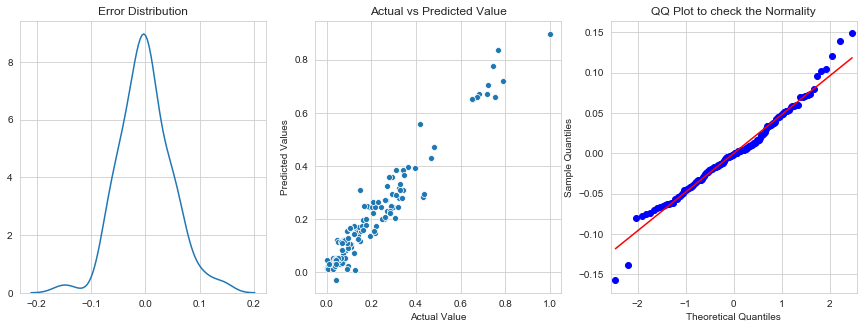

R2 Score 0.9382740947486152
Mean Squared Error is 0.0023185460552494186
====== To check the Hetroscedacity ======
F-statistic : 0.6956
P value : 0.9349


In [75]:
_plot_error_term(lr_model_10, X_train_rfe_sm, y_train)

**Conclusion Driven**:
1. Residual seems more Normally Distributed and also from the QQ Plots the points perfectly fits over the line
2. All the Assumptions are met mostly
    - Error Terms have Zero mean
    - Errors are normally distributed
    - From the second plot it looks like the Error Data have uniform variance ( As there is no pattern )
        - As we can see the value of P Value is quite high and this test basically checks whether variance is the same in 2 subsamples i.e. in Pred vs Actual 
    - Error terms are independent of each other
    
    
### Let's see the Final Predictions on Test Data Set

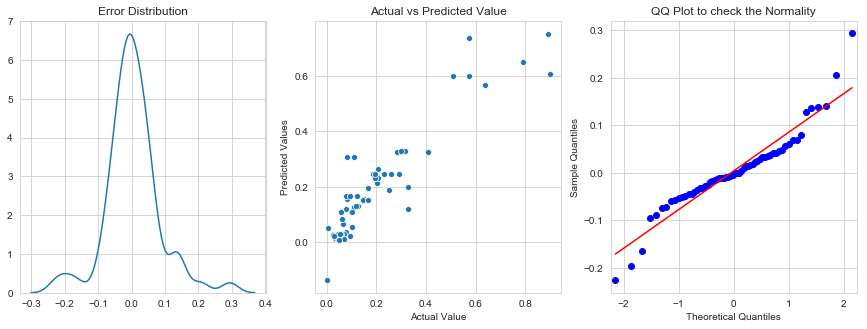

R2 Score 0.8442154446731207
Mean Squared Error is 0.0066517806605793746
====== To check the Hetroscedacity ======
F-statistic : 0.908
P value : 0.6034


In [76]:
X_test_sm = sm.add_constant(X_test)
X_test_rfe_sm = X_test_sm[X_train_rfe_sm.columns.tolist()]
_plot_error_term(lr_model_10, X_test_rfe_sm, y_test)

**Conclusion**
1. As we can see on test set the Final R Square Value is 0.84 
2. And is For Hetroscedacity we can see te P Value is 0.05 hence both the features i.e Y Actual and Y Pred have same set of variance